# Libraries

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import spacy
import matplotlib.pyplot as plt

# Loading

In [2]:
ba_reviews_experts_en = pd.read_parquet('../generated/ba_reviews_experts_en.parquet')[['user_id', 'text']]
rb_reviews_experts_en = pd.read_parquet('../generated/rb_reviews_experts_en.parquet')[['user_id', 'text']]

In [3]:
nlp = spacy.load('en_core_web_sm')
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
stopwords = set(STOPWORDS)
stopwords.update(spacy_stopwords)
stopwords.update(['beer', 'beers'])

In [4]:
beer_mask = np.array(Image.open("../data/BeerCan.jpg"))

# 1st: Naive Topic Detection Using WordClouds

## Introduction to the Method

The goal of this section is to perform a naive and quick exploration of the most frequent words in the BeerAdvocate and RateBeer expert reviews using WordClouds.

Why is this relevant?
- WordClouds provide a visual representation of word frequency, where larger words appear more often in the corpus.
- This approach allows us to quickly identify dominant themes or terms without complex preprocessing or modeling.
- It serves as a first step toward understanding the vocabulary and topics used in each platform’s reviews, highlighting key words that stand out.

While this method is not as sophisticated as advanced techniques (like LDA), it is easy to implement and interpret, making it ideal for an initial exploration of text data.

## How It Works

1. Text Combination:
   - All reviews for each platform (BeerAdvocate and RateBeer) are combined into two large text corpora.
2. Preprocessing:
   - Conversion to lowercase.
   - Removal of stopwords, punctuation, and overly common terms like "beer" or "beers" that add little meaning.
3. WordCloud Generation:
   - A WordCloud is generated for each platform, where word size reflects its frequency in the text.

## What This Method Reveals

- Key words that dominate BeerAdvocate and RateBeer expert reviews.
- Initial insights into the platforms' focus:
  - Do the reviews center on taste, aroma, or presentation?
  - Are there visible patterns that differentiate the two platforms?

## Lemmatization for WordCloud (not-implemented for ressource issues)

We aimed to generate a WordCloud using lemmatized text instead of raw text. Lemmatization reduces words to their base or dictionary form (e.g., "running" → "run", "better" → "good"), which helps group different forms of the same word under a single term. This process enhances the WordCloud's interpretability because: 
- Words like "flavors" and "flavor" will be counted as the same word ("flavor").
- Different grammatical forms of a word (e.g., verbs, plurals) are unified, making the WordCloud more informative.

Unfortunately, the process of lemmatization for the full dataset requires significant computational resources due to: the large size of the text corpus (several million characters) and the iterative processing of chunks through the spaCy NLP pipeline.

We attempted to split the text into manageable chunks of 250,000 characters each to apply lemmatization iteratively. But, even if this method works it needs a time of approximately 8h to lemmatize ba_reviews_experts, thus we decide to not implement it, but we wanted to highlight that **it could be a way to improve the wordcloud representation**.

Cell to run if you want to apply lemmatization before wordcloud (to long to run, ~8hours):

In [6]:
# To long to be runned
"""
print("There are {} characters in the combination of all reviews.".format(len(ba_text)))

chunk_size = 250000  # maximal size of a chunk (in caracters)
chunks = [ba_text[i:i+chunk_size] for i in range(0, len(ba_text), chunk_size)]
print(f"Text divided in {len(chunks)} chunks.")

# lemmatisation by chunck
lemmatized_words = []
for i, chunk in enumerate(chunks):
    print(f"Treating chunk {i+1}/{len(chunks)}...")
    doc = nlp(chunk)
    lemmatized_words.extend([token.lemma_ for token in doc if token.is_alpha and not token.is_stop])

ba_lemmatized_text = " ".join(lemmatized_words)

# Create a word cloud image
wc = WordCloud(background_color="white", 
               mask= beer_mask,
               stopwords=stopwords,
               min_font_size = 6)

# Generate a wordcloud
wc.generate(ba_lemmatized_text)

# show
plt.figure(figsize=[8,8])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# store to file
#wc.to_file("../generated/ba_wordcloud_lemmatized.png")
"""

'\nprint("There are {} characters in the combination of all reviews.".format(len(ba_text)))\n\nchunk_size = 250000  # maximal size of a chunk (in caracters)\nchunks = [ba_text[i:i+chunk_size] for i in range(0, len(ba_text), chunk_size)]\nprint(f"Text divided in {len(chunks)} chunks.")\n\n# lemmatisation by chunck\nlemmatized_words = []\nfor i, chunk in enumerate(chunks):\n    print(f"Treating chunk {i+1}/{len(chunks)}...")\n    doc = nlp(chunk)\n    lemmatized_words.extend([token.lemma_ for token in doc if token.is_alpha and not token.is_stop])\n\nba_lemmatized_text = " ".join(lemmatized_words)\n\n# Create a word cloud image\nwc = WordCloud(background_color="white", \n               mask= beer_mask,\n               stopwords=stopwords,\n               min_font_size = 6,\n               mode= \'RGBA\')\n\n# Generate a wordcloud\nwc.generate(ba_lemmatized_text)\n\n# show\nplt.figure(figsize=[8,8])\nplt.imshow(wc, interpolation="bilinear")\nplt.axis("off")\nplt.show()\n\n# store to file\n

## BeerAdvocate

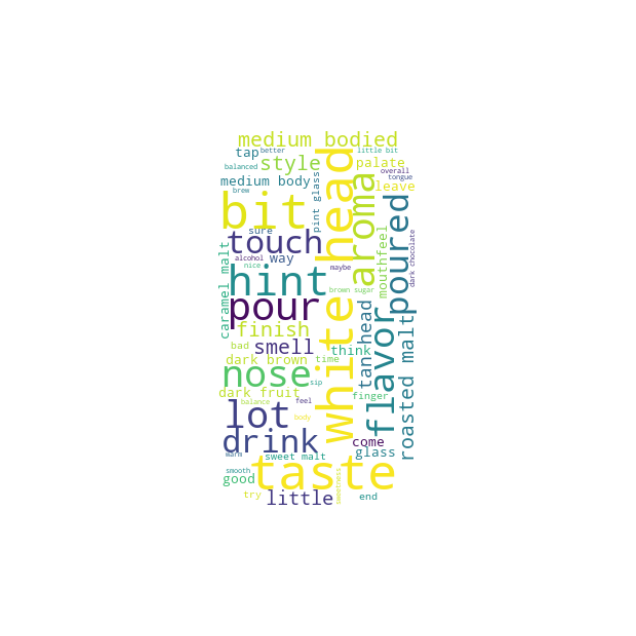

In [7]:
ba_text = " ".join(review for review in ba_reviews_experts_en.text)
ba_text_lower = ba_text.lower()
del ba_text

wc = WordCloud(background_color="white", 
               mask= beer_mask,
               stopwords=stopwords,
               min_font_size = 6)

# Generate a wordcloud
wc.generate(ba_text_lower)

# store to file
wc.to_file("../generated/figures/ba_wordcloud.png")

# show
plt.figure(figsize=[8,8])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

del ba_text_lower, wc

Taste and Flavor Focus:
Words like "taste", "flavor", and "aroma" appear prominently.
This indicates that reviewers place significant emphasis on describing the sensory aspects of beer, particularly taste and smell.

Descriptive Words for Appearance:
Words like "head", "white", "bit", "poured", and "medium bodied" highlight that reviewers also focus on the appearance of the beer.
The word "head" refers to the foam or froth that forms when beer is poured, and "white" suggests a common observation of its color.
"poured" indicates users frequently describe how the beer was served.

Nose and Aroma:
Words like "nose" and "smell" suggest that the aroma of the beer is another key consideration.
Descriptive terms like "dark fruit" and "roasted malt" are used to characterize specific aromatic qualities.
Strength and Body:
Terms such as "medium body", "bodied", and "palate" indicate reviewers often discuss the mouthfeel and overall body of the beer.
"Medium bodied" seems to be a frequent descriptor, reflecting a common preference or observation.

Subtle Descriptions:
Words like "hint", "touch", and "bit" reflect a nuanced approach to reviewing. Reviewers describe subtle notes they detect in flavor, aroma, or texture.

Finish and Aftertaste:
The presence of words like "finish" and "leave" suggests that the aftertaste or lingering effects of the beer on the palate are also discussed.

Positive and Neutral Observations:
Words such as "good", "smooth", and "balanced" appear (less often), showing that reviews likely feature positive tones.
Terms like "bad" are smaller, indicating that negative descriptors are less common.

Serving Context:
Words like "glass", "pint", and "tank" suggest that the context of how beer is served (e.g., from a glass or pint) plays a role in reviews.

This WordCloud reveals that the expert reviews strongly focus on taste, flavor, aroma, and visual presentation. Words like "taste," "head," "aroma," and "flavor" dominate the reviews, reflecting the detailed and sensory-oriented nature of expert evaluations.


## RateBeer

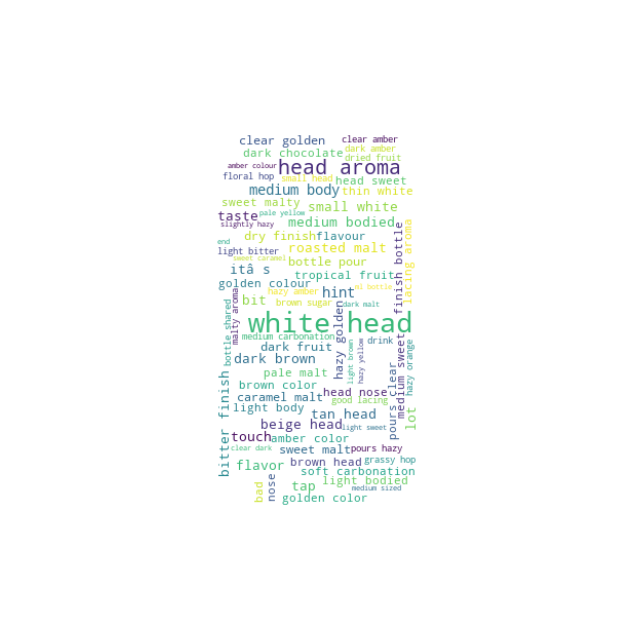

In [8]:
rb_text = " ".join(review for review in rb_reviews_experts_en.text)
rb_text_lower = rb_text.lower()
del rb_text

wc = WordCloud(background_color="white", 
               mask= beer_mask,
               stopwords=stopwords,
               min_font_size = 6)

# Generate a wordcloud
wc.generate(rb_text_lower)

# store to file
wc.to_file("../generated/figures/rb_wordcloud.png")

# show
plt.figure(figsize=[8,8])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

del rb_text_lower, wc

"white", "head", and "aroma" are the most prominent words in the cloud, suggesting that reviewers commonly discuss:
Appearance: "white head" likely refers to the color and foam that forms when the beer is poured.
Scent: "aroma" emphasizes the importance of smell in evaluating beer quality.

Flavor and Taste Descriptions:
Words like "roasted malt", "dark fruit", "bitter finish", and "flavor" highlight reviewers' focus on describing taste profiles.
The presence of words such as "sweet", "chocolate", and "caramel" indicates that sweet and malty flavors are frequently noted.
Terms like "bitter" and "dry finish" suggest attention to the balance between bitterness and smoothness.

Appearance and Color:
Several terms relate to the appearance of the beer:
"golden", "dark brown", "amber", and "clear" describe the color.
Words like "small white", "tan head", and "beige head" highlight the variety of head characteristics.

Mouthfeel and Texture:
Words such as "medium body", "light bodied", and "soft carbonation" suggest reviewers frequently comment on the mouthfeel of the beer, particularly its weight and carbonation.
Terms like "thin white" and "medium bodied" reflect nuanced descriptions.

Serving and Pouring Context:
Words like "bottle", "tap", "pour", and "glass" emphasize that reviewers often reference how the beer was served or poured.

Nuanced and Specific Notes:
Words like "hint", "bit", "nose", and "touch" highlight that reviewers frequently describe subtle aspects of flavor and aroma.

Less Frequent Words:
Words like "bad" are present but appear much smaller, suggesting that most reviews are more positive or neutral in tone.

**Comparison of both**

When comparing the two word clouds, the second dataset appears to cover a greater variety of topics due to a more even distribution of words. However, these observations are limited by the naive nature of WordCloud, which does not distinguish context or semantic relationships between words.